In [1]:
# CREATES THE STOCK DATA CSV

import yfinance as yf
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data import read_stock_history, index_to_date, date_to_index, normalize, write_to_h5py
import h5py

print("Imports Complete!")

Imports Complete!


In [2]:
date_start = "1986-03-24"
date_end = "2020-10-01"


# Boeing symbol: BA
# Coca Cola symbol: KO
# Ford symbol: F
# IBM symbol: IBM
# GE symbol: GE
# JP Morgan symbol: JPM
# Microsoft symbol: MSFT
# Nike symbol: NKE
# Walmart symbol: WMT
# Exxon Mobil symbol: XOM
# Eaton Vance Corp: EV
# Clorox: CLX
# Disney: DIS
# Hasbro: HAS
# MC Donalds: MCD
# Apple : AAPL
# Intel: INTC

yf.pdr_override()
data_ba = pdr.get_data_yahoo("BA", start=date_start, end=date_end)
data_ko = pdr.get_data_yahoo("KO", start=date_start, end=date_end)
data_f = pdr.get_data_yahoo("F", start=date_start, end=date_end)
data_ibm = pdr.get_data_yahoo("IBM", start=date_start, end=date_end)
data_ge = pdr.get_data_yahoo("GE", start=date_start, end=date_end)
data_jpm = pdr.get_data_yahoo("JPM", start=date_start, end=date_end)
data_msft = pdr.get_data_yahoo("MSFT", start=date_start, end=date_end)
data_nke = pdr.get_data_yahoo("NKE", start=date_start, end=date_end)
data_wmt = pdr.get_data_yahoo("WMT", start=date_start, end=date_end)
data_xom = pdr.get_data_yahoo("XOM", start=date_start, end=date_end)
data_ev = pdr.get_data_yahoo("EV", start=date_start, end=date_end)
data_clx = pdr.get_data_yahoo("CLX", start=date_start, end=date_end)
data_dis = pdr.get_data_yahoo("DIS", start=date_start, end=date_end)
data_has = pdr.get_data_yahoo("HAS", start=date_start, end=date_end)
data_mcd = pdr.get_data_yahoo("MCD", start=date_start, end=date_end)
data_aapl = pdr.get_data_yahoo("AAPL", start=date_start, end=date_end)
data_intc = pdr.get_data_yahoo("INTC", start=date_start, end=date_end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [3]:
print("BA: ", data_ba.index[0])
print("KO: ", data_ko.index[0])
print("F: ", data_f.index[0])
print("IBM: ", data_ibm.index[0])
print("GE: ", data_ge.index[0])
print("JPM: ", data_jpm.index[0])
print("MSFT: ", data_msft.index[0])
print("NKE: ", data_nke.index[0])
print("WMT: ", data_wmt.index[0])
print("XOM: ", data_xom.index[0])
print("EV: ", data_ev.index[0])
print("CLX: ", data_clx.index[0])
print("DIS: ", data_dis.index[0])
print("HAS: ", data_has.index[0])
print("MCD: ", data_mcd.index[0])
print("AAPL: ", data_aapl.index[0])
print("INTC: ", data_intc.index[0])

BA:  1986-03-24 00:00:00
KO:  1986-03-24 00:00:00
F:  1986-03-24 00:00:00
IBM:  1986-03-24 00:00:00
GE:  1986-03-24 00:00:00
JPM:  1986-03-24 00:00:00
MSFT:  1986-03-24 00:00:00
NKE:  1986-03-24 00:00:00
WMT:  1986-03-24 00:00:00
XOM:  1986-03-24 00:00:00
EV:  1986-03-24 00:00:00
CLX:  1986-03-24 00:00:00
DIS:  1986-03-24 00:00:00
HAS:  1986-03-24 00:00:00
MCD:  1986-03-24 00:00:00
AAPL:  1986-03-24 00:00:00
INTC:  1986-03-24 00:00:00


In [4]:
# Interpolate
data_ba = data_ba.interpolate(method='polynomial', order=2)
data_ko = data_ko.interpolate(method='polynomial', order=2)
data_f = data_f.interpolate(method='polynomial', order=2)
data_ibm = data_ibm.interpolate(method='polynomial', order=2)
data_ge = data_ge.interpolate(method='polynomial', order=2)
data_jpm = data_jpm.interpolate(method='polynomial', order=2)
data_msft = data_msft.interpolate(method='polynomial', order=2)
data_nke = data_nke.interpolate(method='polynomial', order=2)
data_wmt = data_wmt.interpolate(method='polynomial', order=2)
data_xom = data_xom.interpolate(method='polynomial', order=2)
data_ev = data_ev.interpolate(method='polynomial', order=2)
data_clx = data_clx.interpolate(method='polynomial', order=2)
data_dis = data_dis.interpolate(method='polynomial', order=2)
data_has = data_has.interpolate(method='polynomial', order=2)
data_mcd = data_mcd.interpolate(method='polynomial', order=2)
data_aapl = data_aapl.interpolate(method='polynomial', order=2)
data_intc = data_intc.interpolate(method='polynomial', order=2)

In [5]:
# Daily Returns 
data_ba_dailyReturns = data_ba["Adj Close"].pct_change(1) # 1 for ONE DAY lookback
data_ko_dailyReturns = data_ko['Adj Close'].pct_change(1)
data_f_dailyReturns = data_f['Adj Close'].pct_change(1)
data_ibm_dailyReturns = data_ibm['Adj Close'].pct_change(1)
data_ge_dailyReturns = data_ge['Adj Close'].pct_change(1)
data_jpm_dailyReturns = data_jpm['Adj Close'].pct_change(1)
data_msft_dailyReturns = data_msft['Adj Close'].pct_change(1)
data_nke_dailyReturns = data_nke['Adj Close'].pct_change(1)
data_wmt_dailyReturns = data_wmt['Adj Close'].pct_change(1)
data_xom_dailyReturns = data_xom['Adj Close'].pct_change(1)
data_ev_dailyReturns = data_ev['Adj Close'].pct_change(1)
data_clx_dailyReturns = data_clx['Adj Close'].pct_change(1)
data_dis_dailyReturns = data_dis['Adj Close'].pct_change(1)
data_has_dailyReturns = data_has['Adj Close'].pct_change(1)
data_mcd_dailyReturns = data_mcd['Adj Close'].pct_change(1)
data_aapl_dailyReturns = data_aapl['Adj Close'].pct_change(1)
data_intc_dailyReturns = data_intc['Adj Close'].pct_change(1)


data_ba['Daily Return'] = data_ba_dailyReturns
data_ko['Daily Return'] = data_ko_dailyReturns
data_f['Daily Return'] = data_f_dailyReturns
data_ibm['Daily Return'] = data_ibm_dailyReturns
data_ge['Daily Return'] = data_ge_dailyReturns
data_jpm['Daily Return'] = data_jpm_dailyReturns
data_msft['Daily Return'] = data_msft_dailyReturns
data_nke['Daily Return'] = data_nke_dailyReturns
data_wmt['Daily Return'] = data_wmt_dailyReturns
data_xom['Daily Return'] = data_xom_dailyReturns
data_ev['Daily Return'] = data_ev_dailyReturns
data_clx['Daily Return'] = data_clx_dailyReturns
data_dis['Daily Return'] = data_dis_dailyReturns
data_has['Daily Return'] = data_has_dailyReturns
data_mcd['Daily Return'] = data_mcd_dailyReturns
data_aapl['Daily Return'] = data_aapl_dailyReturns
data_intc['Daily Return'] = data_intc_dailyReturns

data_has.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
1986-03-24,6.925926,6.962963,6.888889,6.944445,3.768578,361000,NaN
1986-03-25,6.907407,6.944445,6.870370,6.944445,3.768578,741100,0.000000
1986-03-26,6.944445,7.074074,6.944445,7.000000,3.798726,794400,0.008000
1986-03-27,7.037037,7.037037,6.981482,7.018518,3.808775,493300,0.002646
1986-03-31,7.018518,7.111111,7.000000,7.092593,3.848972,986100,0.010554


In [6]:
# Log Return
data_ba_logreturns = np.log(data_ba["Adj Close"]/data_ba["Adj Close"].shift(1))
data_ko_logreturns = np.log(data_ko['Adj Close']/data_ko['Adj Close'].shift(1))
data_f_logreturns = np.log(data_f['Adj Close']/data_f['Adj Close'].shift(1))
data_ibm_logreturns = np.log(data_ibm['Adj Close']/data_ibm['Adj Close'].shift(1))
data_ge_logreturns = np.log(data_ge['Adj Close']/data_ge['Adj Close'].shift(1))
data_jpm_logreturns = np.log(data_jpm['Adj Close']/data_jpm['Adj Close'].shift(1))
data_msft_logreturns = np.log(data_msft['Adj Close']/data_msft['Adj Close'].shift(1))
data_nke_logreturns = np.log(data_nke['Adj Close']/data_nke['Adj Close'].shift(1))
data_wmt_logreturns = np.log(data_wmt['Adj Close']/data_wmt['Adj Close'].shift(1))
data_xom_logreturns = np.log(data_xom['Adj Close']/data_xom['Adj Close'].shift(1))
data_ev_logreturns = np.log(data_ev['Adj Close']/data_ev['Adj Close'].shift(1))
data_clx_logreturns = np.log(data_clx['Adj Close']/data_clx['Adj Close'].shift(1))
data_dis_logreturns = np.log(data_dis['Adj Close']/data_dis['Adj Close'].shift(1))
data_has_logreturns = np.log(data_has['Adj Close']/data_has['Adj Close'].shift(1))
data_mcd_logreturns = np.log(data_mcd['Adj Close']/data_mcd['Adj Close'].shift(1))
data_aapl_logreturns = np.log(data_aapl['Adj Close']/data_aapl['Adj Close'].shift(1))
data_intc_logreturns = np.log(data_intc['Adj Close']/data_intc['Adj Close'].shift(1))

data_ba['Log Return'] = data_ba_logreturns
data_ko['Log Return'] = data_ko_logreturns
data_f['Log Return'] = data_f_logreturns
data_ibm['Log Return'] = data_ibm_logreturns
data_ge['Log Return'] = data_ge_logreturns
data_jpm['Log Return'] = data_jpm_logreturns
data_msft['Log Return'] = data_msft_logreturns
data_nke['Log Return'] = data_nke_logreturns
data_wmt['Log Return'] = data_wmt_logreturns
data_xom['Log Return'] = data_xom_logreturns
data_ev['Log Return'] = data_ev_logreturns
data_clx['Log Return'] = data_clx_logreturns
data_dis['Log Return'] = data_dis_logreturns
data_has['Log Return'] = data_has_logreturns
data_mcd['Log Return'] = data_mcd_logreturns
data_aapl['Log Return'] = data_aapl_logreturns
data_intc['Log Return'] = data_intc_logreturns

data_ev.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Log Return
Date,,,,,,,,
1986-03-24,0.750000,0.765625,0.718750,0.765625,0.191019,492800.0,NaN,NaN
1986-03-25,0.750000,0.750000,0.695312,0.695312,0.173477,262400.0,-0.091837,-0.096331
1986-03-26,0.695312,0.742188,0.695312,0.726562,0.181273,108800.0,0.044944,0.043963
1986-03-27,0.726562,0.765625,0.726562,0.750000,0.187121,160000.0,0.032259,0.031749
1986-03-31,0.750000,0.765625,0.718750,0.718750,0.179324,169600.0,-0.041667,-0.042560


In [7]:
# Check if all start correctly
print("BA: ", data_ba.index[0], ", ", data_ba['Close'].iloc[0])
print("KO: ", data_ko.index[0], ", ", data_ko['Close'].iloc[0])
print("F: ", data_f.index[0], ", ", data_f['Close'].iloc[0])
print("IBM: ", data_ibm.index[0], ", ", data_ibm['Close'].iloc[0])
print("GE: ", data_ge.index[0], ", ", data_ge['Close'].iloc[0])
print("JPM: ", data_jpm.index[0], ", ", data_jpm['Close'].iloc[0])
print("MSFT: ", data_msft.index[0], ", ", data_msft['Close'].iloc[0])
print("NKE: ", data_nke.index[0], ", ", data_nke['Close'].iloc[0])
print("WMT: ", data_wmt.index[0], ", ", data_wmt['Close'].iloc[0])
print("XOM: ", data_xom.index[0], ", ", data_xom['Close'].iloc[0])
print("EV: ", data_ev.index[0], ", ", data_ev['Close'].iloc[0])
print("CLX: ", data_clx.index[0], ", ", data_clx['Close'].iloc[0])
print("DIS: ", data_dis.index[0], ", ", data_dis['Close'].iloc[0])
print("HAR: ", data_has.index[0], ", ", data_has['Close'].iloc[0])
print("MCD: ", data_mcd.index[0], ", ", data_mcd['Close'].iloc[0])
print("AAPL: ", data_aapl.index[0], ", ", data_aapl['Close'].iloc[0])
print("INTC: ", data_intc.index[0], ", ", data_intc['Close'].iloc[0])

BA:  1986-03-24 00:00:00 ,  12.44444465637207
KO:  1986-03-24 00:00:00 ,  2.1848957538604736
F:  1986-03-24 00:00:00 ,  4.896446228027344
IBM:  1986-03-24 00:00:00 ,  37.21875
GE:  1986-03-24 00:00:00 ,  3.0899438858032227
JPM:  1986-03-24 00:00:00 ,  17.70833396911621
MSFT:  1986-03-24 00:00:00 ,  0.0902777761220932
NKE:  1986-03-24 00:00:00 ,  0.265625
WMT:  1986-03-24 00:00:00 ,  2.4609375
XOM:  1986-03-24 00:00:00 ,  6.875
EV:  1986-03-24 00:00:00 ,  0.765625
CLX:  1986-03-24 00:00:00 ,  7.0625
DIS:  1986-03-24 00:00:00 ,  2.877291679382324
HAR:  1986-03-24 00:00:00 ,  6.94444465637207
MCD:  1986-03-24 00:00:00 ,  5.30555534362793
AAPL:  1986-03-24 00:00:00 ,  0.1194196417927742
INTC:  1986-03-24 00:00:00 ,  0.578125


In [8]:
# Remove first row:
#data_ba.drop(data_ba.index[:1], inplace=True)
#data_ko.drop(data_ko.index[:1], inplace=True)
#data_f.drop(data_f.index[:1], inplace=True)
#data_ibm.drop(data_ibm.index[:1], inplace=True)
#data_ge.drop(data_ge.index[:1], inplace=True)
#data_jpm.drop(data_jpm.index[:1], inplace=True)
#data_msft.drop(data_msft.index[:1], inplace=True)
#data_nke.drop(data_nke.index[:1], inplace=True)
#data_wmt.drop(data_wmt.index[:1], inplace=True)
#data_xom.drop(data_xom.index[:1], inplace=True)

# Add codes:
data_ba['Code'] = "BA"
data_ko['Code'] = "KO"
data_f['Code'] = "F"
data_ibm['Code'] = "IBM"
data_ge['Code'] = "GE"
data_jpm['Code'] = "JPM"
data_msft['Code'] = "MSFT"
data_nke['Code'] = "NKE"
data_wmt['Code'] = "WMT"
data_xom['Code'] = "XOM"
data_ev['Code'] = "EV"
data_clx['Code'] = "CLX"
data_dis['Code'] = "DIS"
data_has['Code'] = "HAS"
data_mcd['Code'] = "MCD"
data_aapl['Code'] = "AAPL"
data_intc['Code'] = "INTC"

data_ko.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Log Return,Code
Date,,,,,,,,,
1986-03-24,2.177083,2.205729,2.177083,2.184896,0.087741,19588800.0,NaN,NaN,KO
1986-03-25,2.184896,2.187500,2.166667,2.166667,0.087009,9374400.0,-0.008344,-0.008379,KO
1986-03-26,2.174479,2.218750,2.174479,2.205729,0.088578,13022400.0,0.018029,0.017868,KO
1986-03-27,2.205729,2.242188,2.192708,2.208333,0.088682,13267200.0,0.001180,0.001179,KO
1986-03-31,2.208333,2.244792,2.187500,2.192708,0.088055,9441600.0,-0.007076,-0.007101,KO


In [9]:
# Lets put all of this into one Dataframe
frames = [data_ba, data_ko, data_f, data_ibm, data_ge, data_jpm, data_msft, data_nke, 
          data_wmt, data_xom, data_ev, data_clx, data_dis, data_has, data_mcd, data_aapl, 
          data_intc]

result_df = pd.concat(frames)

result_df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Log Return,Code
Date,,,,,,,,,
1986-03-24,12.277778,12.555555,11.944445,12.444445,5.989748,1864800.0,NaN,NaN,BA
1986-03-25,12.416667,12.416667,12.166667,12.250000,5.896157,2182800.0,-0.015625,-0.015749,BA
1986-03-26,12.250000,12.472222,12.250000,12.388889,5.963011,1782800.0,0.011339,0.011275,BA
1986-03-27,12.666667,12.833333,12.666667,12.722222,6.123446,2151200.0,0.026905,0.026549,BA
1986-03-31,12.722222,12.833333,12.555555,12.666667,6.096709,1615400.0,-0.004366,-0.004376,BA


In [10]:
# Save as CSV
#pd.DataFrame(result).to_csv(
#            'datasets/stock_data.csv', index=True)

/home/nigelcuschieri/anaconda3/envs/tensor_keras_portfolio/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


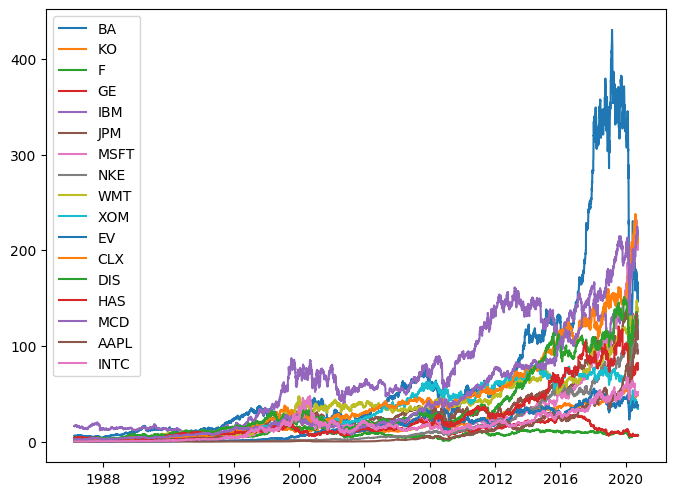

In [11]:
# PLOT ADJ CLOSE
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(data_ba['Adj Close'],label="BA")
plt.plot(data_ko['Adj Close'],label="KO")
plt.plot(data_f['Adj Close'],label="F")
plt.plot(data_ge['Adj Close'],label="GE")
plt.plot(data_ibm['Adj Close'],label="IBM")
plt.plot(data_jpm['Adj Close'],label="JPM")
plt.plot(data_msft['Adj Close'],label="MSFT")
plt.plot(data_nke['Adj Close'],label="NKE")
plt.plot(data_wmt['Adj Close'],label="WMT")
plt.plot(data_xom['Adj Close'],label="XOM")
plt.plot(data_ev['Adj Close'],label="EV")
plt.plot(data_clx['Adj Close'],label="CLX")
plt.plot(data_dis['Adj Close'],label="DIS")
plt.plot(data_has['Adj Close'],label="HAS")
plt.plot(data_mcd['Adj Close'],label="MCD")
plt.plot(data_aapl['Adj Close'],label="AAPL")
plt.plot(data_intc['Adj Close'],label="INTC")

plt.legend()
plt.show()

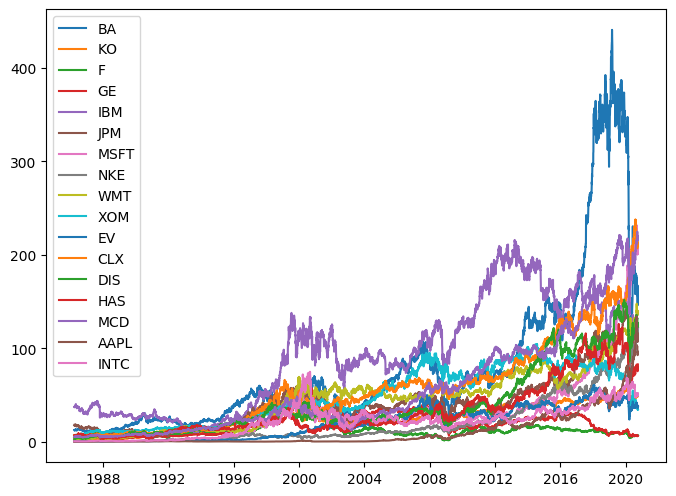

In [12]:
# PLOT CLOSE
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(data_ba['Close'],label="BA")
plt.plot(data_ko['Close'],label="KO")
plt.plot(data_f['Close'],label="F")
plt.plot(data_ge['Close'],label="GE")
plt.plot(data_ibm['Close'],label="IBM")
plt.plot(data_jpm['Close'],label="JPM")
plt.plot(data_msft['Close'],label="MSFT")
plt.plot(data_nke['Close'],label="NKE")
plt.plot(data_wmt['Close'],label="WMT")
plt.plot(data_xom['Close'],label="XOM")
plt.plot(data_ev['Close'],label="EV")
plt.plot(data_clx['Close'],label="CLX")
plt.plot(data_dis['Close'],label="DIS")
plt.plot(data_has['Close'],label="HAS")
plt.plot(data_mcd['Close'],label="MCD")
plt.plot(data_aapl['Close'],label="AAPL")
plt.plot(data_intc['Close'],label="INTC")

plt.legend()
plt.show()

## Save H5 with Open, Low, High, Close
Result is to be (assets, dates, features)

In [13]:
assets = ['BA', 'KO', 'F', 'GE', 'IBM', 'JPM', 'MSFT', 'NKE', 'WMT', 
          'XOM', 'EV', 'CLX', 'DIS', 'HAS', 'MCD', 'AAPL', 'INTC']
data = [data_ba.values.tolist(), 
        data_ko.values.tolist(), 
        data_f.values.tolist(), 
        data_ge.values.tolist(), 
        data_ibm.values.tolist(), 
        data_jpm.values.tolist(), 
        data_msft.values.tolist(), 
        data_nke.values.tolist(), 
        data_wmt.values.tolist(), 
        data_xom.values.tolist(), 
        data_ev.values.tolist(), 
        data_clx.values.tolist(), 
        data_dis.values.tolist(), 
        data_has.values.tolist(), 
        data_mcd.values.tolist(), 
        data_aapl.values.tolist(),
        data_intc.values.tolist()]    
dates = data_ba.index.tolist()
dates = [date_obj.strftime('%d/%m/%Y') for date_obj in data_ba.index.tolist()]

In [14]:
data[0]

[[12.277777671813965,
  12.55555534362793,
  11.94444465637207,
  12.44444465637207,
  5.989748001098633,
  1864800,
  nan,
  nan,
  'BA'],
 [12.416666984558105,
  12.416666984558105,
  12.166666984558105,
  12.25,
  5.896157264709473,
  2182800,
  -0.015625154242214223,
  -0.015748513658654782,
  'BA'],
 [12.25,
  12.472222328186035,
  12.25,
  12.38888931274414,
  5.963011264801025,
  1782800,
  0.011338571393218588,
  0.011274771605284607,
  'BA'],
 [12.666666984558105,
  12.833333015441895,
  12.666666984558105,
  12.722222328186035,
  6.123446464538574,
  2151200,
  0.0269050640042523,
  0.026549486560865962,
  'BA'],
 [12.722222328186035,
  12.833333015441895,
  12.55555534362793,
  12.666666984558105,
  6.09670877456665,
  1615400,
  -0.00436644463649094,
  -0.004376005397044338,
  'BA'],
 [12.583333015441895,
  12.583333015441895,
  12.30555534362793,
  12.44444465637207,
  5.989748001098633,
  2762400,
  -0.017544018817861273,
  -0.01769973911045141,
  'BA'],
 [12.361110687255

In [15]:
_result = []
for i in range(len(data)): # ASSET
    _asset = []
    for j in range(len(data[0])): # DATES
        _asset.append(data[i][j][:4])
    _result.append(_asset)

In [16]:
result = np.array(_result)

In [17]:
result

array([[[1.22777777e+01, 1.25555553e+01, 1.19444447e+01, 1.24444447e+01],
        [1.24166670e+01, 1.24166670e+01, 1.21666670e+01, 1.22500000e+01],
        [1.22500000e+01, 1.24722223e+01, 1.22500000e+01, 1.23888893e+01],
        ...,
        [1.60330002e+02, 1.68000000e+02, 1.59199997e+02, 1.66080002e+02],
        [1.64770004e+02, 1.65500000e+02, 1.62009995e+02, 1.63600006e+02],
        [1.64500000e+02, 1.70979996e+02, 1.64110001e+02, 1.65259995e+02]],

       [[2.17708325e+00, 2.20572925e+00, 2.17708325e+00, 2.18489575e+00],
        [2.18489575e+00, 2.18750000e+00, 2.16666675e+00, 2.16666675e+00],
        [2.17447925e+00, 2.21875000e+00, 2.17447925e+00, 2.20572925e+00],
        ...,
        [4.82000008e+01, 4.87599983e+01, 4.79799995e+01, 4.87200012e+01],
        [4.93100014e+01, 4.97099991e+01, 4.91399994e+01, 4.92799988e+01],
        [4.93899994e+01, 4.95600014e+01, 4.89099998e+01, 4.89199982e+01]],

       [[4.85082722e+00, 4.94206524e+00, 4.85082722e+00, 4.89644623e+00],
        

In [18]:
result.shape

(17, 8703, 4)

In [19]:
abb = [abbr.encode() for abbr in assets]
write_to_h5py(result, abb, dates, "datasets/yahoo_snp500_dataset.h5")

In [20]:
with h5py.File('datasets/yahoo_snp500_dataset.h5', 'r') as f:
    history = f['history'][:]
    abbreviation = f['abbreviation'][:].tolist()
    dates = f['dates'][:].tolist()

In [26]:
import datetime
dates = [datetime.datetime.strptime(date_str, '%d/%m/%Y') for date_str in dates]

In [27]:
dates

[datetime.datetime(1986, 3, 24, 0, 0),
 datetime.datetime(1986, 3, 25, 0, 0),
 datetime.datetime(1986, 3, 26, 0, 0),
 datetime.datetime(1986, 3, 27, 0, 0),
 datetime.datetime(1986, 3, 31, 0, 0),
 datetime.datetime(1986, 4, 1, 0, 0),
 datetime.datetime(1986, 4, 2, 0, 0),
 datetime.datetime(1986, 4, 3, 0, 0),
 datetime.datetime(1986, 4, 4, 0, 0),
 datetime.datetime(1986, 4, 7, 0, 0),
 datetime.datetime(1986, 4, 8, 0, 0),
 datetime.datetime(1986, 4, 9, 0, 0),
 datetime.datetime(1986, 4, 10, 0, 0),
 datetime.datetime(1986, 4, 11, 0, 0),
 datetime.datetime(1986, 4, 14, 0, 0),
 datetime.datetime(1986, 4, 15, 0, 0),
 datetime.datetime(1986, 4, 16, 0, 0),
 datetime.datetime(1986, 4, 17, 0, 0),
 datetime.datetime(1986, 4, 18, 0, 0),
 datetime.datetime(1986, 4, 21, 0, 0),
 datetime.datetime(1986, 4, 22, 0, 0),
 datetime.datetime(1986, 4, 23, 0, 0),
 datetime.datetime(1986, 4, 24, 0, 0),
 datetime.datetime(1986, 4, 25, 0, 0),
 datetime.datetime(1986, 4, 28, 0, 0),
 datetime.datetime(1986, 4, 29, 

In [22]:
history

array([[[1.22777777e+01, 1.25555553e+01, 1.19444447e+01, 1.24444447e+01],
        [1.24166670e+01, 1.24166670e+01, 1.21666670e+01, 1.22500000e+01],
        [1.22500000e+01, 1.24722223e+01, 1.22500000e+01, 1.23888893e+01],
        ...,
        [1.60330002e+02, 1.68000000e+02, 1.59199997e+02, 1.66080002e+02],
        [1.64770004e+02, 1.65500000e+02, 1.62009995e+02, 1.63600006e+02],
        [1.64500000e+02, 1.70979996e+02, 1.64110001e+02, 1.65259995e+02]],

       [[2.17708325e+00, 2.20572925e+00, 2.17708325e+00, 2.18489575e+00],
        [2.18489575e+00, 2.18750000e+00, 2.16666675e+00, 2.16666675e+00],
        [2.17447925e+00, 2.21875000e+00, 2.17447925e+00, 2.20572925e+00],
        ...,
        [4.82000008e+01, 4.87599983e+01, 4.79799995e+01, 4.87200012e+01],
        [4.93100014e+01, 4.97099991e+01, 4.91399994e+01, 4.92799988e+01],
        [4.93899994e+01, 4.95600014e+01, 4.89099998e+01, 4.89199982e+01]],

       [[4.85082722e+00, 4.94206524e+00, 4.85082722e+00, 4.89644623e+00],
        

In [23]:
abbreviation

['BA',
 'KO',
 'F',
 'GE',
 'IBM',
 'JPM',
 'MSFT',
 'NKE',
 'WMT',
 'XOM',
 'EV',
 'CLX',
 'DIS',
 'HAS',
 'MCD',
 'AAPL',
 'INTC']

In [24]:
history[10]

array([[ 0.75      ,  0.765625  ,  0.71875   ,  0.765625  ],
       [ 0.75      ,  0.75      ,  0.6953125 ,  0.6953125 ],
       [ 0.6953125 ,  0.7421875 ,  0.6953125 ,  0.7265625 ],
       ...,
       [35.70000076, 36.88000107, 35.65999985, 36.83000183],
       [37.56999969, 38.45999908, 37.47000122, 38.41999817],
       [38.36999893, 38.36999893, 37.43999863, 38.09999847]])